<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/%5BDeep%20Learning%5D%20XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설명 가능한 딥러닝 모델

## 딥러닝의 결과를 설명하는 방법

설명 가능한 딥러닝 : XAI(Explainable AI)<br>
ex) 이미지를 사용해 이름이나 물건의 종류를 맞히는 모델을 만들었다면, 이미지의 어디를 보고 왜 그런 판단을 했는지 설명해내는 또 다른 그림을 그려내는 것

딥러닝을 결과를 설명해주는 방법 중 널리 사용되는 것(2가지)<br>
<b>CAM(Class Activation Map)</b>
1. CNN의 Flatten 단계 직전에 개입해서 그때까지 만들어진 중간 맵(CNN을 거쳐 마지막 예측을 위한 단계까지 온 데이터들)들을 따로 모은다.
2. 각각의 중간 맵들로부터 평균값(Global Max Pooling, GAP)(중간 맵 안에 들어있는 모든 값의 평균)을 뽑는다.
3. 이 평균값과 최종 예측 사이에서 한 번 더 학습한다.
4. 어떤 중간 맵이 최종 결정에 큰 역할을 하는지 알려주는 가중치를 얻게 된다.
5. 이 가중치를 각 중간 맵에 곱해 중요한 중간 맵은 가중하고 불필요한 중간 맵은 자연스럽게 없애면서 특징 맵을 만들어 내는 것<br>
-> This is <b>CAM</b><br>
<b>그레이디언트 CAM(Gradient CAM)</b>
- 같은 원리이지만, 평균값을 계산하기 위해 모델을 구조를 바꿔야 하는 번거로움을 피하고자 평균값 대신 기울기을 이용하는 방법

<b>마스크 방식 or 오클루전(폐쇄성 민감도(Occlusion Sensitivity)) 방식</b>
- 일부를 가리면서 가려진 부분이 결과에 얼마나 영향을 미치는지 계산하는 방식

## XAI 실행

설명 가능한 딥러닝 방식을 구현하게 해주는 tf-explain 라이브러리와 이를 돕는 OpenCV 라이브러리 필요

In [1]:
# tf-explain 라이브러리 설치
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 998.8 kB/s eta 0:00:00


In [2]:
# Gradient CAM, 폐쇄성 민감도 방식 함수 불러오기
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [ ]:
# 모델은 앞서 다룬 imagenet 학습 모델 불러와 전이학습 실시
model = VGG16(weights='imagenet', include_top=True)

In [ ]:
# Gradient CAM 실행
explainer = GradCAM() # gradient CAM 알고리즘 선택
output = explainer.explain(데이터, 모델, 클래스) # gradient CAM 실행(explain() : XAI 실행 함수) / 클래스 : 이미지넷의 클래스 번호
explainer.save(output, 저장될 폴더, 저장될 이름) # 실행 후 저장될 위치와 이름

In [ ]:
# Occlusion 방식 실행
explainer = OcclusionSensitivity() # occlusion 알고리즘 선택
# 패치 크기 설정 추가
output = explainer.explain(데이터, 모델, 클래스, 패치 크기) # 패치 크기 : 이미지의 일부를 가리는 부분의 크기
# 크게 하면 조금 더 넓은 범위의 결과, 작제 하면 조금 더 세밀한 부분을 가리키는 결과가 나온다.
explainer.save(output, 저장될 폴더, 저장될 이름)

fatal: destination path 'data' already exists and is not an empty directory.
2/2 [==============================] - 23s 3s/step


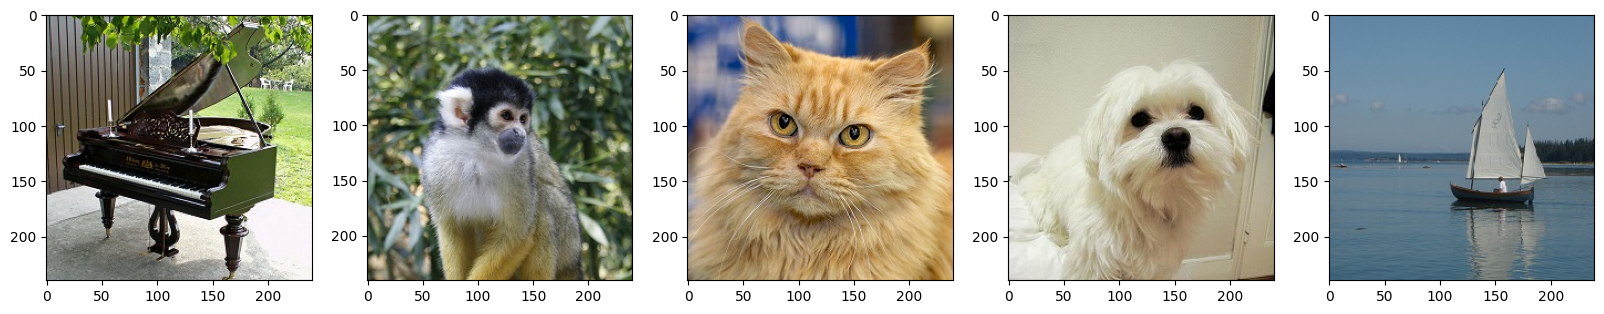

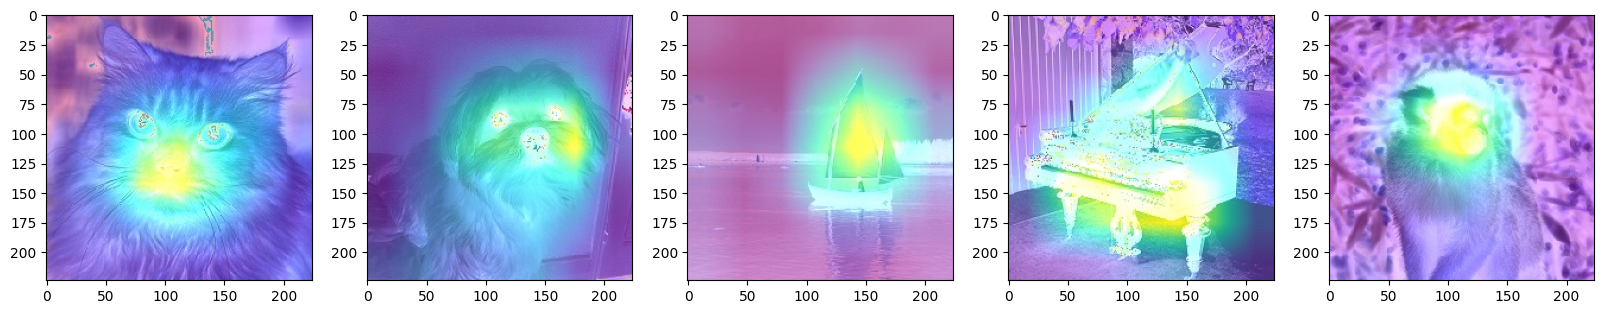

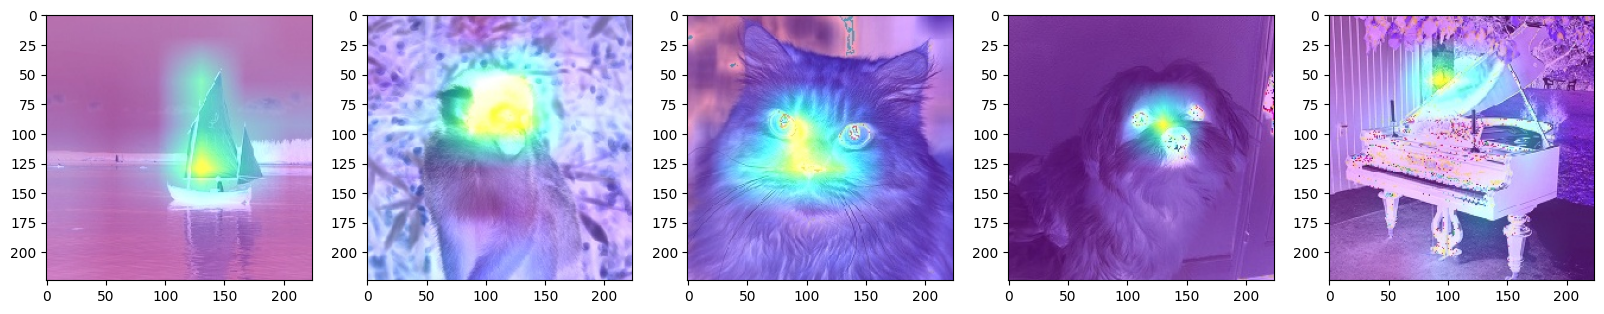

In [4]:
# 전체 코드
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘 불러오기
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

# 이미지 불러와 출력하는 데 사용될 라이브러리
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 깃허브에서 데이터 가져오기
!git clone https://github.com/taehojo/data.git

# 원본 이미지가 들어갈 리스트 선언
images_originals = []

# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 저장
for img_path in glob.glob('./data/img/*_0.jpg'):
  images_originals.append(mpimg.imread(img_path))

# 출력될 이미지 크기
plt.figure(figsize=(20,20))

# 원본 이미지 출력
for i, image_o in enumerate(images_originals):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_o)

# 전이학습 모델 불러오기
model = VGG16(weights='imagenet', include_top=True)

# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
input_list = ['maltese', 'persian_cat', 'squirrel_monkey', 'grand_piano', 'yawl']
imagenet_index = ['153', '283', '382', '579', '914']

# gradient CAM 알고리즘 선택
explainer = GradCAM()

# gradient CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_cams = []

# gradient CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
  # 이미지 불러오고 내부에서 처리될 이미지의 크기 설정
  img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224,224))
  img = img_to_array(img) # 이미지를 넘파이 배열로 변환
  data = ([img], None)
  # gradient CAM 실행되는 부분
  grid = explainer.explain(data, model, int(i))
  # 실행 후 저장되는 이름
  explainer.save(grid, '.', './data/img/{}_cam.jpg'.format(l))

# gradient CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
  images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_c)

# Occlusion 알고리즘 선택
explainer = OcclusionSensitivity()

# Occlusion 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_occ1s = []

# 패치 크기 설정
patch_size = 40

# occlusion 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
  img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224,224))
  img = img_to_array(img)
  data = ([img], None)
  # 패치 크기 설정 추가
  grid = explainer.explain(data, model, int(i), patch_size)
  explainer.save(grid, '.', './data/img/{}_occ1.jpg'.format(l))

# occlusion 알고리즘이 적용된 이미지 출력
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_occ1.jpg'):
  images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
  plt.subplot(5, 5, i+1)
  plt.imshow(image)